In [1]:
%matplotlib inline 

In [2]:
#I imported stuff that at the end didn't use...
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
from matplotlib import animation
from matplotlib.animation import FuncAnimation

#### Here we define the corresponding dictionaries containing the information of the pulses

In [3]:
Rabi={
    'Amplitude' : 4 ,
    'Start Duration' : 5,
    'End Duration': 5,
    'Start time' : 0,
    'End time': 0,
}
# Maybe I should just rename this Pump, since from its form right now it doesn't the dynamics of the states are far from clear
#I dont really use End time for the this pulse since I am not sweeping it

In [4]:
Probe1={
    'Amplitude' : 2 ,
    'Start Duration' : 7,
    'End Duration': 5 ,
    'Start time' : 0,
    'End time': 20,
}

In [5]:
Probe2={
    'Amplitude' : 3 ,
    'Start Duration' : 9,
    'End Duration': 20 ,
    'Start time' : 0,
    'End time': 5,
}

#I mainly used this one to check on other initial conditions without having to rename everything so often, maybe I should implement
#the classes as you suggested me

### Pulse function and Sweeping:

In [5]:
def Pl(Pulse,t):
    """Primitive rectangular pulse, A corresponds to the amplitude of the pulse, t should be evaluated over the array of time"""
    """given by the points starting at Start time, through the duration given by Start Duration """
    
    pul= Pulse['Amplitude']* (  Pulse['Start time'] <=  t <= Pulse['Start Duration'] + Pulse['Start time'] )
   
    return pul

In [6]:
def genSweep(Pulse1,Pulse2,time,dt):
    "Generates the two pulses: Pulse 1 and Pulse 2, Pulse2 will be swept"
    "in the interval [0, Endtime] with a time step given by dt, "
    plu1=np.array([Pl(Pulse1,t) for t in time])
    for i in range(Pulse2['Start time'], Pulse2['End time']+dt,dt): #it is kind of ambiguos to define the sweeping interval in this way I think...
        plu2=np.array([ Pl(Pulse2,(t-i)) for t in time])
        pulss= np.add(plu1,plu2)
    return pulss
        
    
    

In [7]:
#the time interval to evaluate the pulses and make the corresponding plot
trog=np.linspace(-1,50,1000)

In [8]:
#Evaluating the corresponding function over the time interval trog with Rabi and Probe 1 pulses, with a sweeping step dt=1
ar=genSweep(Rabi,Probe1,trog,1)

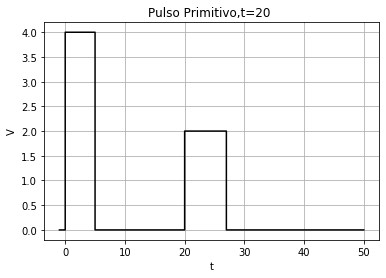

In [10]:
%matplotlib inline

fig,ax= plt.subplots()



ax.grid(True)
#plt.plot(t, P_raa, '-g')
#plt.plot(t,P_proo,'-r')
#plt.step(trtr,reer,'-r')
#plt.plot(time,huhh,'-b')
plt.step(trog,ar,color='Black')
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title('Pulso Primitivo,t=20 ')

fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

This Plot corresponds to the last iteration of the sweep function, where the Probe1 pulse "went" from t=0 to t=20, given by the information within it's dictionary

Function works fine, but there is a caviet when during the sweeping while using short sweeping intervals, most probably has to do with the definiition of the sweeping range with the range() function.
Maybe it would be a good idea to separate the initial position from the sweeping range, since now both of them are given by Pulse['Start time'] , or add an if at the beginin for those cases where there is no sweeping...

### Rework!

Parameters within the dictionaries should not be addressed!, rather, from a function calculate everything!
N= number of points, Deltat

In [3]:
Rabi={
    'Amplitude' : 4 ,
    'Start Duration' : 5,
    'End Duration': 5,
    'Start time' : 0,
    'End time': 0,
}
# Maybe I should just rename this Pump, since from its form right now it doesn't the dynamics of the states are far from clear
#I dont really use End time for the this pulse since I am not sweeping it

In [4]:
Probe1={
    'Amplitude' : 2 ,
    'Start Duration' : 7,
    'End Duration': 5 ,
    'Start time' : 0,
    'End time': 20,
}

In [187]:
Probe2={
    'Amplitude' : 7 ,
    'Start Duration' : 3,
    'End Duration': 20 ,
    'Start time' : 10,
    'End time': 9,
}

#I mainly used this one to check on other initial conditions without having to rename everything so often, maybe I should implement
#the classes as you suggested me

In [196]:
Pulses_List3=[Rabi,Probe1,Probe2]

In [198]:
Pulses_List=[Rabi,Probe1]

In [201]:
Pulses_List2=[Rabi,Probe2]

In [7]:
Pulses_List[0]['Amplitude']

4

In [21]:
Pulses_List[2]['Amplitude']

3

In [131]:
def Pl(PlLis,time):
    pl=np.zeros((len(PlLis),len(trog))) 
    for i in range(0,len(PlLis)):
        pl[i]=[PlLis[i]['Amplitude'] * (  PlLis[i]['Start time'] <=  t <= PlLis[i]['Start Duration'] + PlLis[i]['Start time']) for t in time ]
    return pl

It works, now have to add em up

In [176]:
def Pl(PlLis,time):
    pl=np.zeros((len(PlLis),len(trog))) 
    for i in range(0,len(PlLis)):
        pl[i]=[PlLis[i]['Amplitude'] * (  PlLis[i]['Start time'] <=  t <= PlLis[i]['Start Duration'] + PlLis[i]['Start time']) for t in time ]
    return pl

In [192]:
def Pl(PlLis,time):
    pl=np.zeros((len(PlLis),len(trog))) 
    for i in range(0,len(PlLis)):
        pl[i]=[PlLis[i]['Amplitude'] * (  PlLis[i]['Start time'] <=  t <= PlLis[i]['Start Duration'] + PlLis[i]['Start time']) for t in time ]
    y=np.zeros(len(pl[0]))
    for i in range(0,len(pl)):
        y += pl[i]
    return y

In [197]:
a=Pl(Pulses_List3,trog)

In [199]:
b=Pl(Pulses_List,trog)

In [202]:
c=Pl(Pulses_List2,trog)

Text(0.5, 1.0, 'Pulso Primitivo, Listas ')

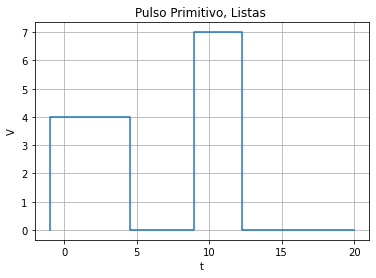

In [203]:
%matplotlib inline

fig,ax= plt.subplots()



ax.grid(True)
plt.step(trog,c)
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title('Pulso Primitivo, Listas ')

#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

In [194]:
a

array([0., 6., 6., 6., 6., 6., 2., 2., 0., 0., 7., 7., 7., 0., 0., 0., 0.,
       0., 0., 0.])

In [171]:
y=np.zeros(len(a[0]))

In [172]:
y+a[1]

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

In [164]:
a[1]

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

In [170]:
len(a[0])

10

In [173]:
y=np.zeros(len(a[0]))
for i in range(0,len(a)):
    y = y + a[i] 
    

In [175]:
a

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.]])

In [174]:
y

array([9., 9., 9., 9., 9., 9., 9., 9., 9., 9.])

In [140]:
Pl(Pulses_List,trog)

array([[0., 4., 4., 4., 4., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 7., 7., 7., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [156]:
a[0]+a[1]

array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6.])

In [97]:
 x=np.zeros((len(Pulses_List),len(trog)))
for i in range(0,len(Pulses_List)):
           x[i]=i

In [111]:
 x=np.zeros((len(Pulses_List),len(trog))) 
for i in range(0,len(Pulses_List)):
    x[i]=[Pulses_List[i]['Amplitude'] * (  Pulses_List[i]['Start time'] <=  t <= Pulses_List[i]['Start Duration'] + Pulses_List[i]['Start time']) for t in trog ]

In [37]:
x=np.array([Pl(Pulse,t) for Pulse in Pulses_List for t in trog])

In [95]:
a=np.zeros((len(Pulses_List),len(trog)))

In [112]:
x

array([[0., 4., 4., 4., 4., 0., 0., 0., 0., 0.],
       [0., 2., 2., 2., 2., 2., 2., 0., 0., 0.],
       [0., 3., 3., 3., 3., 3., 3., 3., 3., 0.]])

In [128]:
trog

array([-1.        ,  0.10526316,  1.21052632,  2.31578947,  3.42105263,
        4.52631579,  5.63157895,  6.73684211,  7.84210526,  8.94736842,
       10.05263158, 11.15789474, 12.26315789, 13.36842105, 14.47368421,
       15.57894737, 16.68421053, 17.78947368, 18.89473684, 20.        ])

In [121]:
trog=np.linspace(-1,20,20)

In [73]:
def pl(Pulse,t):
    pl = Pulse[i]['Amplitude'] * (  Pulse[i]['Start time'] <=  t <= Pulse[i]['Start Duration'] + Pulse[i]['Start time'])


In [55]:
x=[]
for i in range(0,len(Pulses_List)):
    x +=[ Pulses_List[i]['Amplitude']+2]
    

In [76]:
trog

array([-1.        ,  0.22222222,  1.44444444,  2.66666667,  3.88888889,
        5.11111111,  6.33333333,  7.55555556,  8.77777778, 10.        ])

In [92]:
x=np.array( [  Pulses_List[i]['Amplitude'] * (  Pulses_List[i]['Start time'] <=  t <= Pulses_List[i]['Start Duration'] + Pulses_List[i]['Start time'] ) for i in range(0,len(Pulses_List)) for t in trog ] ) 

In [95]:
x.size

200

In [133]:
len(Pulses_List)

3

In [106]:
def eps(Pulses,t):
    pul=np.array( [  Pulses_List[i]['Amplitude'] * (  Pulses_List[i]['Start time'] <=  t <= Pulses_List[i]['Start Duration'] + Pulses_List[i]['Start time'] ) for i in range(0,len(Pulses_List)) for t in trog ] ) 
    return pul

In [117]:
def ops(Pulses,time):
    for j in range(0,len(Pulses)):
        pul=np.array( [  Pulses[i]['Amplitude'] * (  Pulses[i]['Start time'] <=  t <= Pulses[i]['Start Duration'] + Pulses[i]['Start time'] ) for i in range(0,len(Pulses_List)) for t in time ] ) 
        return pul
    

In [118]:
ops(Pulses_List,trog)

array([0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [96]:
x[:99]

array([0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
def Pul()

In [130]:
def Pl(Pulses,time):
    pul=np.zeros((len(Pulses)))
    for i in range(0,len(Pulses)):
        for j in range(0, len(Pulses)):
            if i != j:
                pul= np.add( np.array( [  Pulses[i]['Amplitude'] * (  Pulses[i]['Start time'] <=  t <= Pulses[i]['Start Duration'] + Pulses[i]['Start time'] )  for t in time ] ),np.array( [  Pulses[j]['Amplitude'] * (  Pulses[i]['Start time'] <=  t <= Pulses[j]['Start Duration'] + Pulses[j]['Start time'] )  for t in time ] )  )
                return pul

In [134]:
comida=Pl(Pulses_List,trog)

In [41]:
def Pl(Pulses,t):
    pul=np.zeros((len(Pulses_List),len(Pulses_List)))
    for i in range(0,len(Pulses)):
            pul[i] += np.array(Pulses[j]['Amplitude'] * (  Pulses[j]['Start time'] <=  t <= Pulses[j]['Start Duration'] + Pulses[j]['Start time'] ))
            return pul

In [12]:
probo

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
asdasd=np.array([])

In [28]:
def Pl(Pulses,t):
    pul=np.array[ Pulses[i]['Amplitude'] * (  Pulses[i]['Start time'] <=  t <= Pulses[i]['Start Duration'] + Pulses[i]['Start time'] ) for i in range(0,len(Pulses)) ]

In [27]:
np.zeros((len(Pulses_List),len(Pulses_List)))

array([[0., 0.],
       [0., 0.]])

In [45]:
Prueba=[Pl(x,10) for x in Pulses_List]

KeyError: 0

In [ ]:

pul=np.zeros((len(Pulses_List),len(Pulses_List)))
for d in xrange(0,66):
    x.append(data[:,d])

In [43]:
Prueba

[array([[0., 0.],
        [0., 0.]]),
 array([[0., 0.],
        [0., 0.]]),
 array([[0., 0.],
        [0., 0.]]),
 array([[0., 0.],
        [0., 0.]]),
 array([[0., 0.],
        [0., 0.]]),
 array([[4., 4.],
        [0., 0.]]),
 array([[4., 4.],
        [0., 0.]]),
 array([[4., 4.],
        [0., 0.]]),
 array([[4., 4.],
        [0., 0.]]),
 array([[4., 4.],
        [0., 0.]]),
 array([[4., 4.],
        [0., 0.]]),
 array([[4., 4.],
        [0., 0.]]),
 array([[4., 4.],
        [0., 0.]]),
 array([[4., 4.],
        [0., 0.]]),
 array([[4., 4.],
        [0., 0.]]),
 array([[4., 4.],
        [0., 0.]]),
 array([[4., 4.],
        [0., 0.]]),
 array([[4., 4.],
        [0., 0.]]),
 array([[4., 4.],
        [0., 0.]]),
 array([[4., 4.],
        [0., 0.]]),
 array([[4., 4.],
        [0., 0.]]),
 array([[4., 4.],
        [0., 0.]]),
 array([[4., 4.],
        [0., 0.]]),
 array([[4., 4.],
        [0., 0.]]),
 array([[4., 4.],
        [0., 0.]]),
 array([[4., 4.],
        [0., 0.]]),
 array([[4.,

In [23]:
np.zeros((2, 1))

array([[0.],
       [0.]])

In [52]:
Prueba[700]

array([0., 0.])

In [101]:
y=x[:100]+x[100:]

In [75]:
trog=np.linspace(-1,10,10)

Text(0.5, 1.0, 'Pulso Primitivo, Listas ')

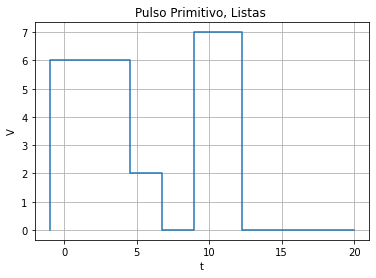

In [195]:
%matplotlib inline

fig,ax= plt.subplots()



ax.grid(True)
plt.step(trog,a)
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title('Pulso Primitivo, Listas ')

#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

In [176]:
def Pl(PlLis,time):
    pl=np.zeros((len(PlLis),len(trog))) 
    for i in range(0,len(PlLis)):
        pl[i]=[PlLis[i]['Amplitude'] * (  PlLis[i]['Start time'] <=  t <= PlLis[i]['Start Duration'] + PlLis[i]['Start time']) for t in time ]
    return pl

array of arrays, each entry is a pulse, add them up at the end GO BACK!